In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis as da
df30 = pd.read_csv("../data/UCLA_EE_grad_2030.csv",header=None)
df31 = pd.read_csv("../data/UCLA_EE_grad_2031.csv",header=None)

In [39]:
df0 = df30[(df30[[2]] == -1).values]
P0 = df0.shape[0] / df31.shape[0]
meanGPA0 = np.mean(df0[[0]])
meanGRE0 = np.mean(df0[[1]])

df1 = df30[(df30[[2]] == 1).values]
P1 = df1.shape[0] / df31.shape[0]
meanGPA1 = np.mean(df1[[0]])
meanGRE1 = np.mean(df1[[1]])

In [46]:
model = da.LinearDiscriminantAnalysis(store_covariance=True)
model.fit(df30[[0,1]], df30[[2]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis(store_covariance=True)

In [58]:
w = np.dot(np.linalg.inv(model.covariance_), np.array([meanGPA1 - meanGPA0 , meanGRE1 - meanGRE0]))
b = np.dot(np.transpose(w), np.array([(meanGPA1 + meanGPA0)/2, (meanGRE1 + meanGRE0)/2]))

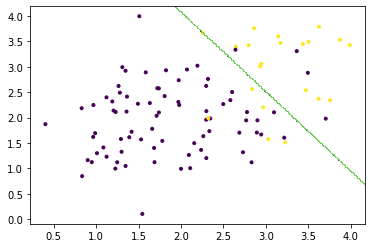

In [97]:
plt.scatter(df30[[0]], df30[[1]], c=df30[[2]], marker='.')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
nx, ny = 200, 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.savefig("3b.png")